<a id='I' name="I"></a>
## [Introduction](#P0)

Workflow:   - Read the dataset information and details at the source.
- Download the dataset using pandas.
- List all the columns and try to interpret each one.
- Identify artifacts and other unusual things at first.
- Use analyse dataframe to do analysis - level 2.
- Exploratory data analysis
- Feature selection
- Scaling and normalization
- Data splitting - Train test validation

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Magics

### Packages

In [1]:
# General
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


In [2]:
plt.style.use("fivethirtyeight")

In [3]:
# check pycaret version
from pycaret.utils import version
version()

'3.3.1'

### Custom classes and functions

In [4]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/Users/ayushyapare/Desktop/Ayushya/Snippets')

from DataFrame_Analysis import analyze_dataframe, eda

### Global Parameters Setting

## Data Retrieval and introduction


__Telecom customers__: Dataset consisting of different features of customers of a telecom company and based on their usage and other factors, one can cluster the customers into different segments and predict if a customer is going to churn (cancel the subscription).

#### Download Data

In [5]:
# import the dataset
df = pd.read_csv('../data/raw/telecom_users.csv', index_col=0)

#### Data exploration

In [6]:
# Basic:
# 1. Shape
# 2. Columns - look for artifacts in column name
# 3. Info - look for appropriate datatypes 
# 4. Describe - look for min max mean and std. 

In [7]:
df.shape

(5986, 21)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [10]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [12]:
# Check for missing values in the DataFrame
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Display all duplicate rows
# Identify duplicate rows
df.duplicated().sum()


0

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
# Advanced (Separate categorical and numerical)
# 1. value counts | Unique values | Missing values
# 2. Explore column of interest
#    1. Hist / Countplot
#    2. Boxplot

#### Perform exploratory data analysis on each column

___Initial observations___   
_Interesting to know the correlation between:_
1. Paperless_billing may be unimpotrant

_Some ambiguous column names can be changed:_   
1. Partner --> married
2. Dependents --> childern

_Total charges must be numerical_


In [16]:
# Rename columns for avoiding ambiguity
df.rename(columns={'Partner': 'Married', 'Dependents': 'Children'}, inplace=True)

In [17]:
# replace all values like ' ' to 0 in numerical columns

In [18]:
incorrect_values = [" "]
df.replace(incorrect_values, '0', inplace=True)


In [19]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges)

In [20]:
df.head(5)

,customerID,gender,SeniorCitizen,Married,Children,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [21]:
# Replace Senior citizen 1 with 'yes' and 0 with 'no'
#df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'yes',0: 'no'})

# Replace gender with 1:Male and 0:Female
#df['gender'] = df['gender'].replace({'Male':1,'Female':0})

# Replace churn
#df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [22]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('../data/processed/telecom_users.csv', index=False)

In [23]:
# 1. Drop Customerid column since it does not give any statistical information
# 2. Drop Churn atleast for the clustering

df.drop(columns=['customerID'], inplace=True)


The first column is not the index, it is: gender

16 duplicate rows found.


Do you want to remove duplicates? (yes/no):  yes


Duplicates removed.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 1869 to 860
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5970 non-null   object 
 1   SeniorCitizen     5970 non-null   int64  
 2   Married           5970 non-null   object 
 3   Children          5970 non-null   object 
 4   tenure            5970 non-null   int64  
 5   PhoneService      5970 non-null   object 
 6   MultipleLines     5970 non-null   object 
 7   InternetService   5970 non-null   object 
 8   OnlineSecurity    5970 non-null   object 
 9   OnlineBackup      5970 non-null   object 
 10  DeviceProtection  5970 non-null   object 
 11  TechSupport       5970 non-null   object 
 12  StreamingTV       5970 non-null   object 
 13  StreamingMovies   5970 non-null   object 
 14  Contract          5970 non-null   object 
 15  PaperlessBilling  5970 non-null   object 
 16  Pay

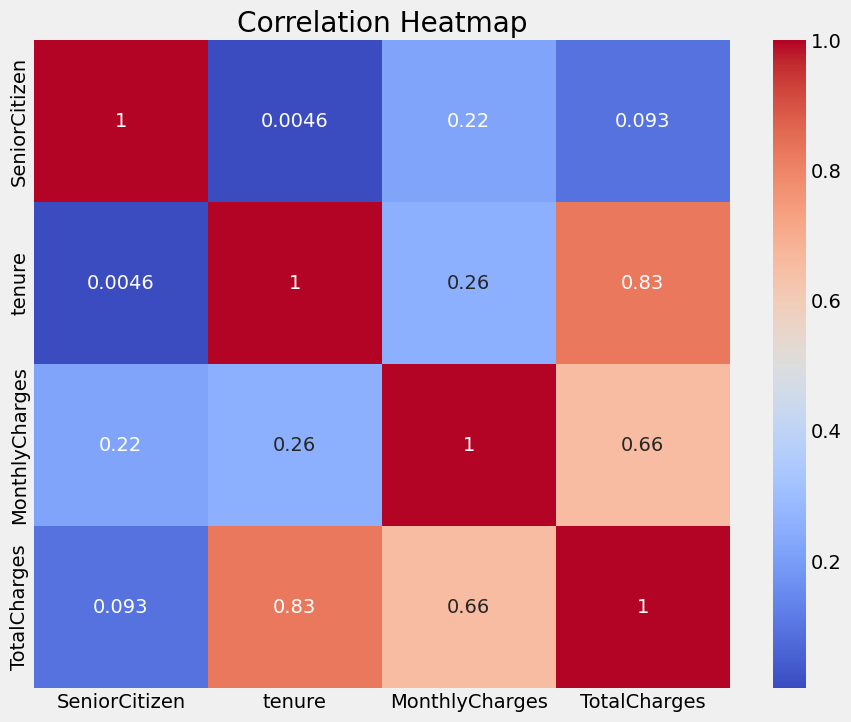

--------------------Gender-------------------------
        total   percent
Male     3040  0.509213
Female   2930  0.490787




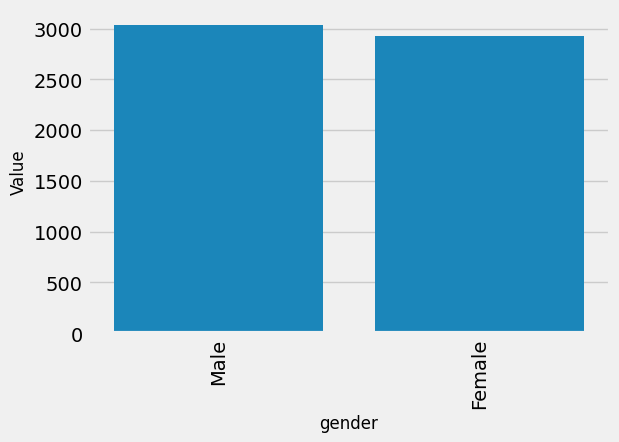

--------------------Married-------------------------
     total   percent
No    3066  0.513568
Yes   2904  0.486432




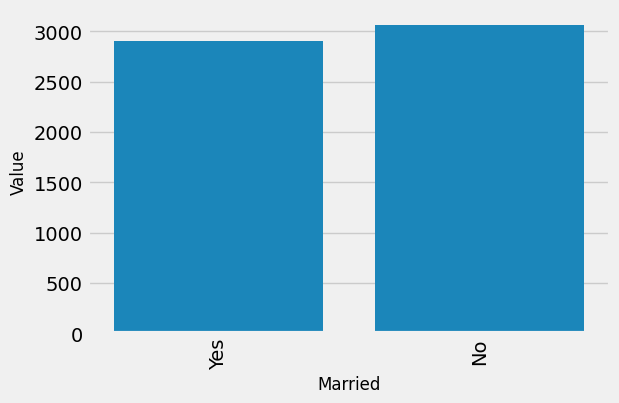

--------------------Children-------------------------
     total  percent
No    4179      0.7
Yes   1791      0.3




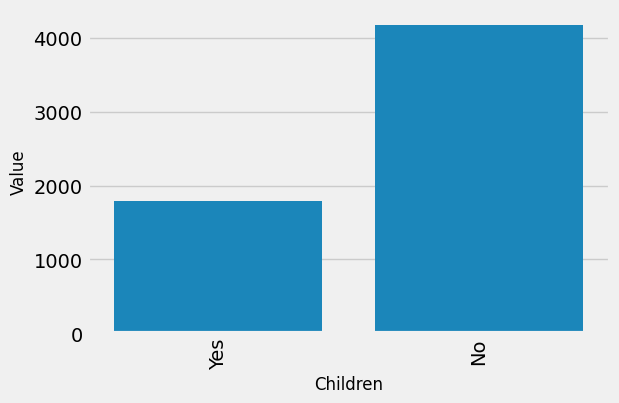

--------------------Phoneservice-------------------------
     total   percent
Yes   5380  0.901173
No     590  0.098827




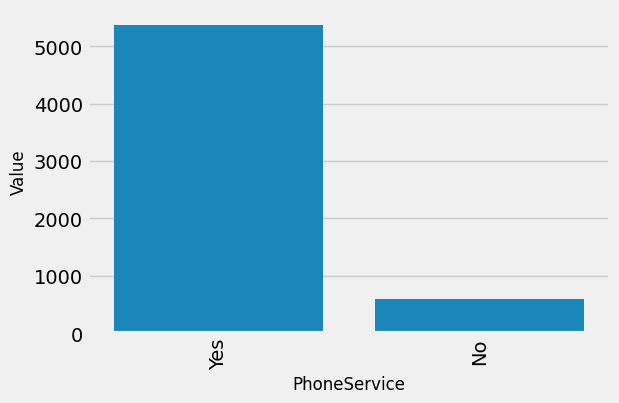

--------------------Multiplelines-------------------------
                  total   percent
No                 2832  0.474372
Yes                2548  0.426801
No phone service    590  0.098827




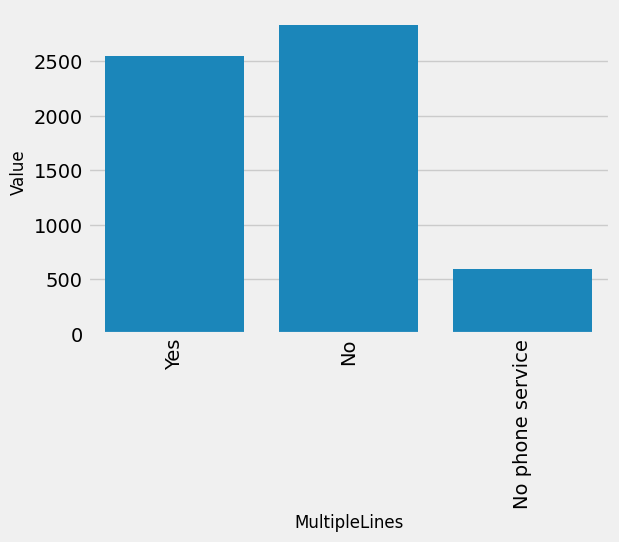

--------------------Internetservice-------------------------
             total   percent
Fiber optic   2622  0.439196
DSL           2066  0.346064
No            1282  0.214740




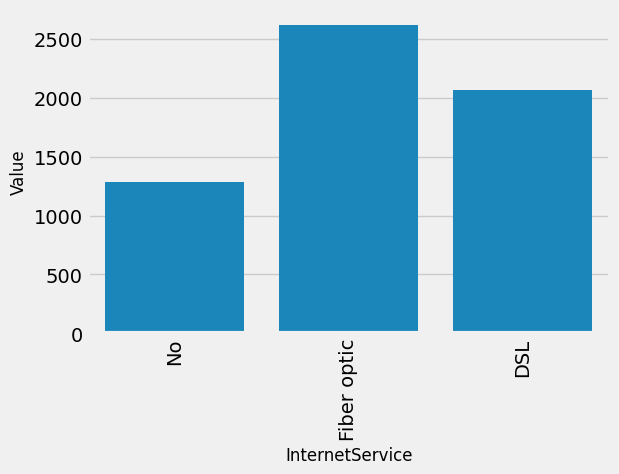

--------------------Onlinesecurity-------------------------
                     total   percent
No                    2975  0.498325
Yes                   1713  0.286935
No internet service   1282  0.214740




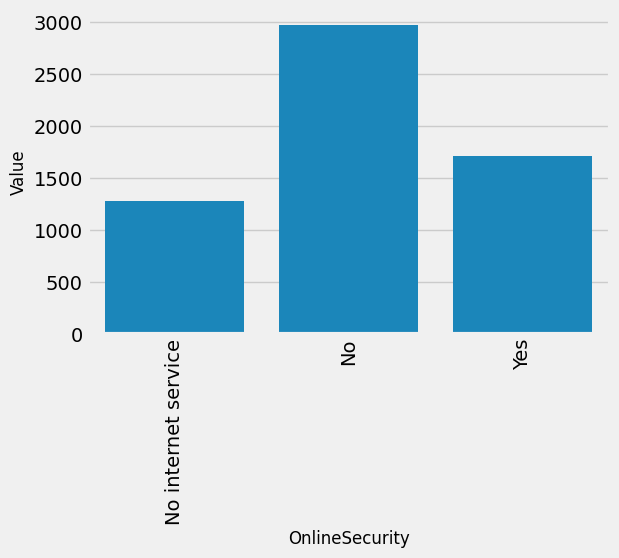

--------------------Onlinebackup-------------------------
                     total   percent
No                    2598  0.435176
Yes                   2090  0.350084
No internet service   1282  0.214740




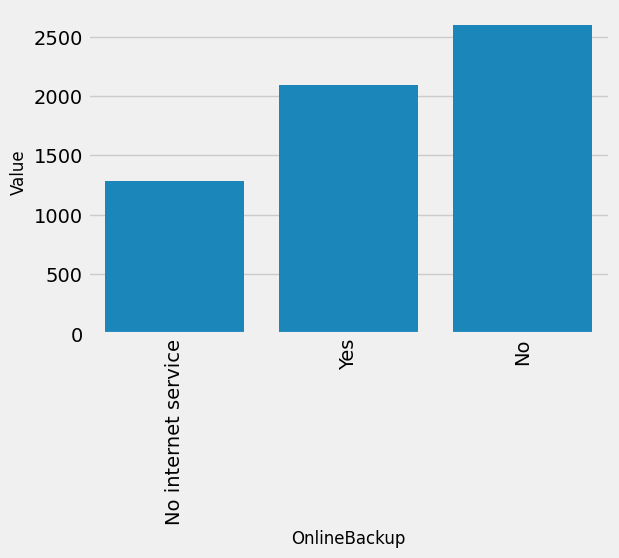

--------------------Deviceprotection-------------------------
                     total   percent
No                    2633  0.441039
Yes                   2055  0.344221
No internet service   1282  0.214740




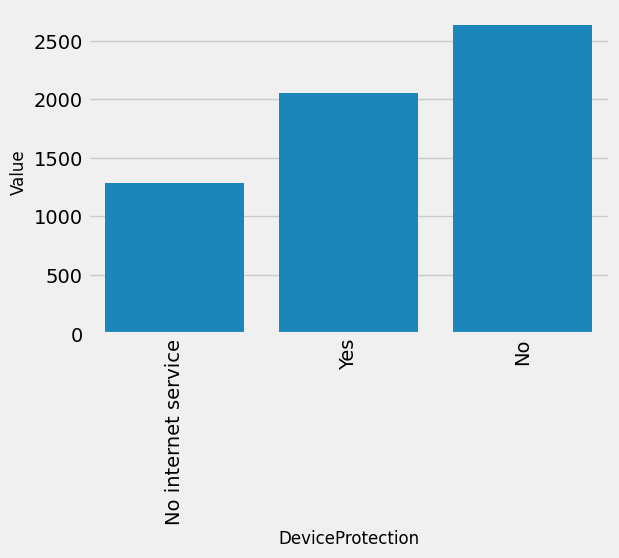

--------------------Techsupport-------------------------
                     total  percent
No                    2953  0.49464
Yes                   1735  0.29062
No internet service   1282  0.21474




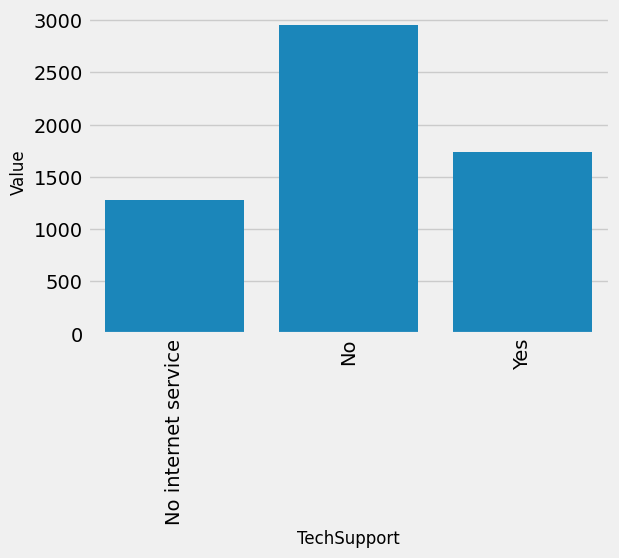

--------------------Streamingtv-------------------------
                     total   percent
No                    2382  0.398995
Yes                   2306  0.386265
No internet service   1282  0.214740




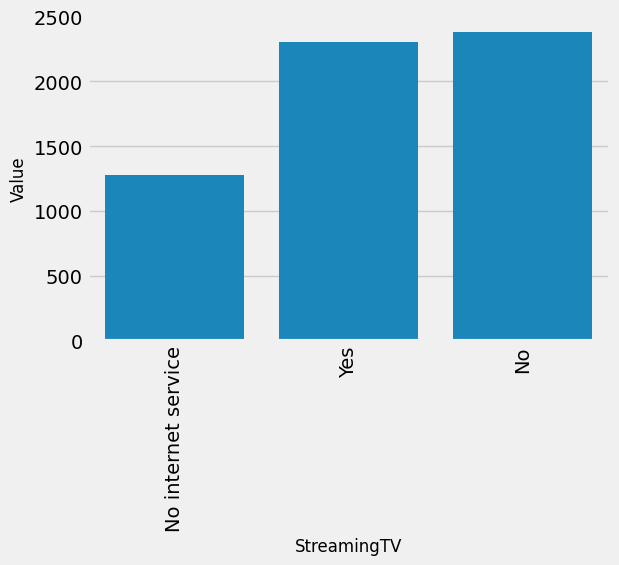

--------------------Streamingmovies-------------------------
                     total   percent
No                    2349  0.393467
Yes                   2339  0.391792
No internet service   1282  0.214740




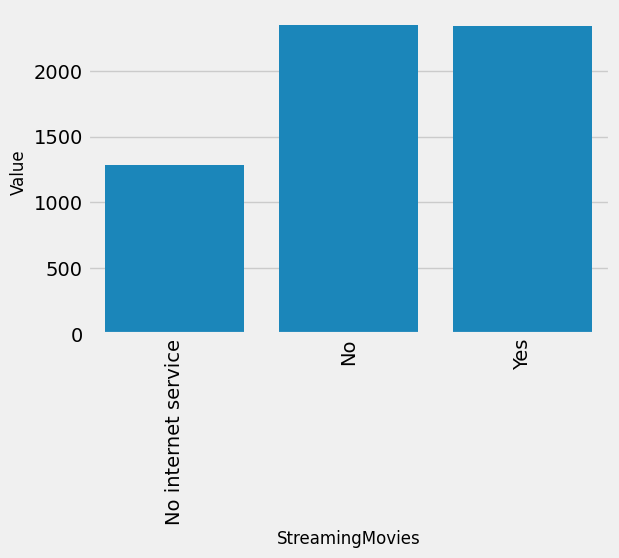

--------------------Contract-------------------------
                total   percent
Month-to-month   3253  0.544891
Two year         1441  0.241374
One year         1276  0.213735




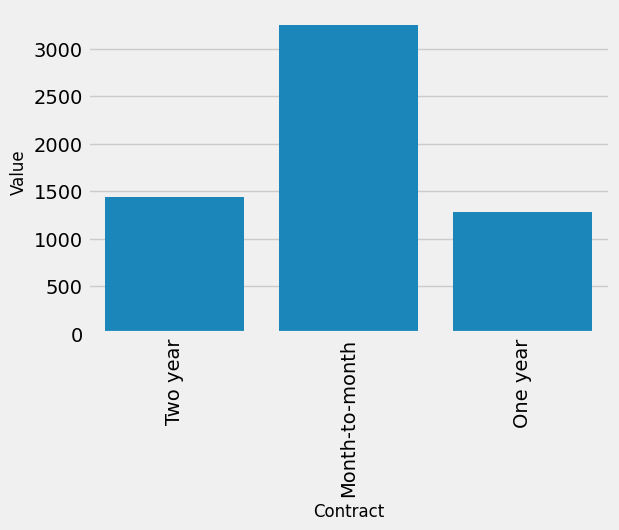

--------------------Paperlessbilling-------------------------
     total   percent
Yes   3520  0.589615
No    2450  0.410385




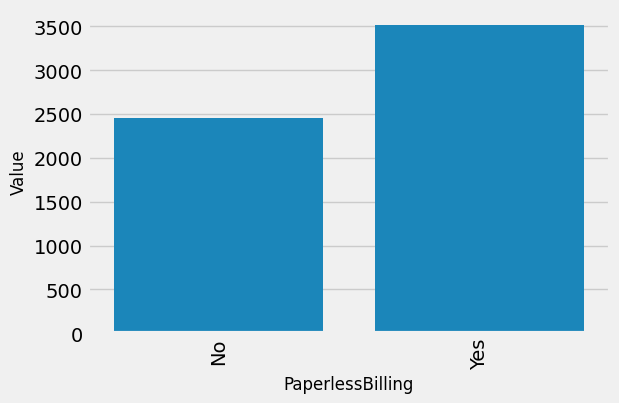

--------------------Paymentmethod-------------------------
                           total   percent
Electronic check            2001  0.335176
Mailed check                1358  0.227471
Bank transfer (automatic)   1308  0.219095
Credit card (automatic)     1303  0.218258




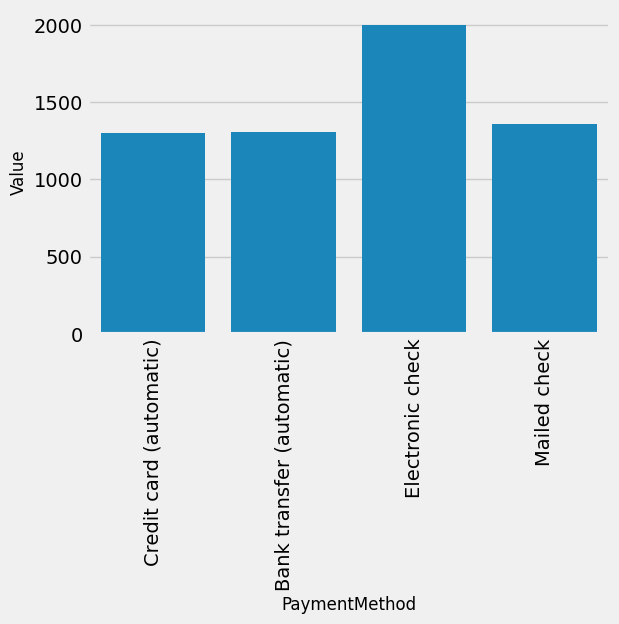

--------------------Churn-------------------------
     total   percent
No    4393  0.735846
Yes   1577  0.264154




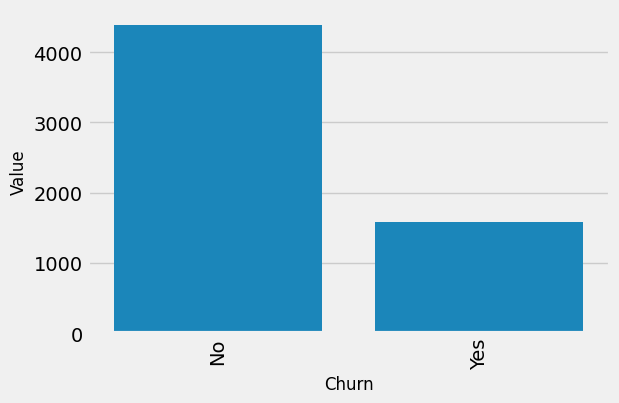

--------------------Numerical features -------------------------


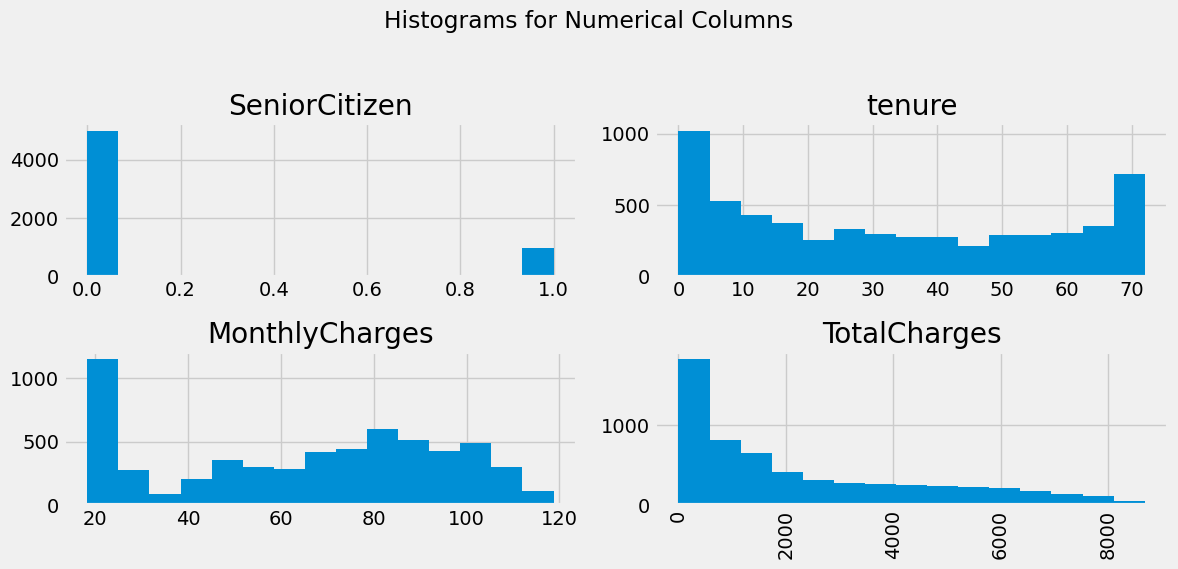

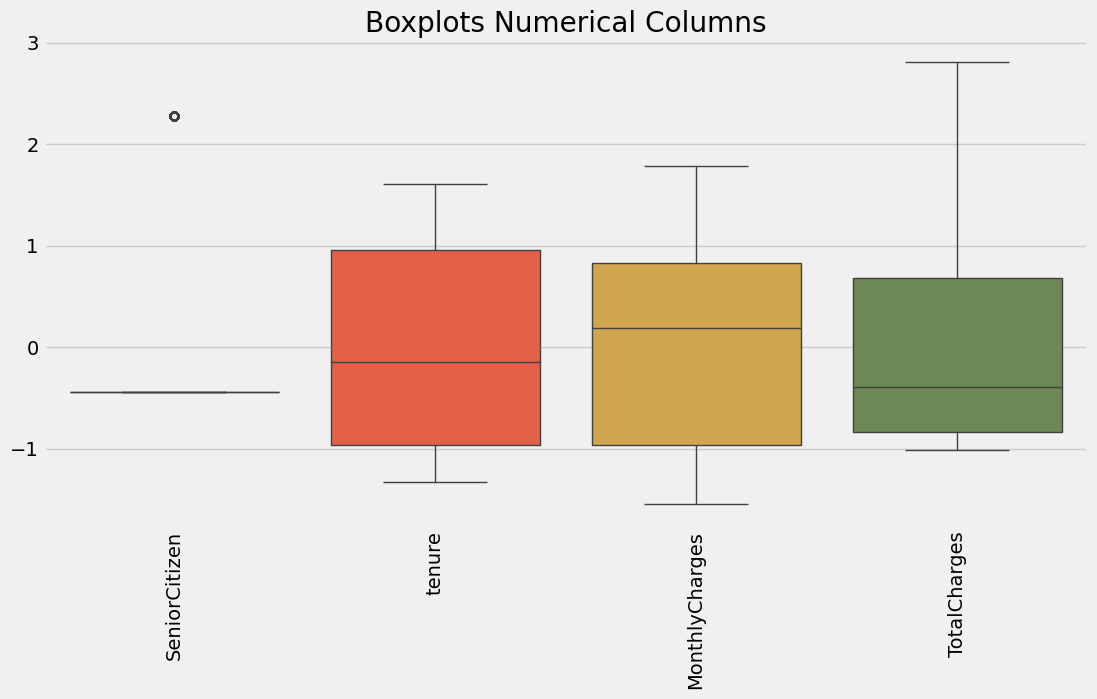

In [24]:
# Perform EDA now
analyze_dataframe(df)

___Observations___
1. The section of the customers which are categorized as 'No internet service' -> ambiguous for the model.

Example:   
StreamingMovies    
No                     2356   
Yes                    2339   
No internet service    1291

Irrelevant for model. It wants to know if Customer streams movie or not. 


Suggestions:   
- group into new category
- remove from this feature as these customers are already segregated in 'Internet service' column.
- Change the values 'No internet access' to 'No'. This makes sense that assuming these customers do not stream movies, or even if they do, they do not do it through our client's network. So categorize under 'No'

In [25]:
# Remove the no internet section of the customers
internet_service_features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for feature in internet_service_features:
    df[feature] = df[feature].replace('No internet service', 'No')

#df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [26]:
# Drop PaperlessBilling
df.drop(columns=['PaperlessBilling'], inplace=True)


The first column is not the index, it is: gender

8 duplicate rows found.


Do you want to remove duplicates? (yes/no):  yes


Duplicates removed.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962 entries, 1869 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5962 non-null   object 
 1   SeniorCitizen     5962 non-null   int64  
 2   Married           5962 non-null   object 
 3   Children          5962 non-null   object 
 4   tenure            5962 non-null   int64  
 5   PhoneService      5962 non-null   object 
 6   MultipleLines     5962 non-null   object 
 7   InternetService   5962 non-null   object 
 8   OnlineSecurity    5962 non-null   object 
 9   OnlineBackup      5962 non-null   object 
 10  DeviceProtection  5962 non-null   object 
 11  TechSupport       5962 non-null   object 
 12  StreamingTV       5962 non-null   object 
 13  StreamingMovies   5962 non-null   object 
 14  Contract          5962 non-null   object 
 15  PaymentMethod     5962 non-null   object 
 16  Mon

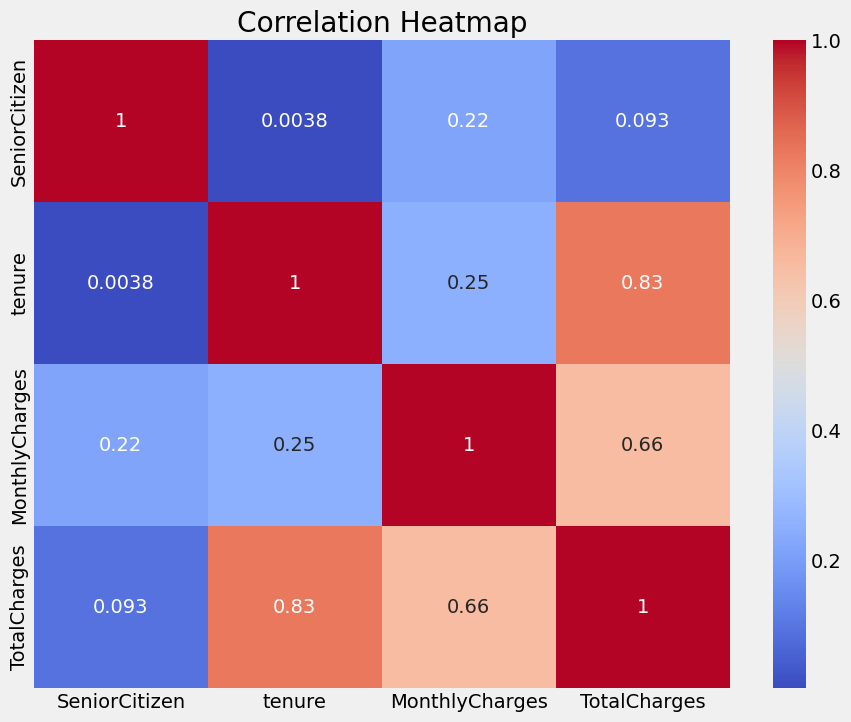

--------------------Gender-------------------------
        total   percent
Male     3033  0.508722
Female   2929  0.491278




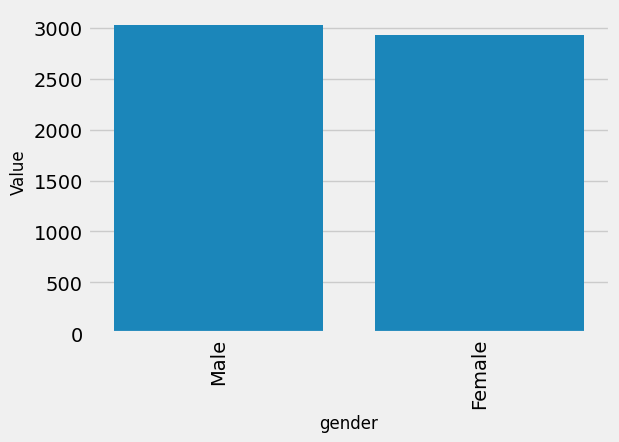

--------------------Married-------------------------
     total   percent
No    3058  0.512915
Yes   2904  0.487085




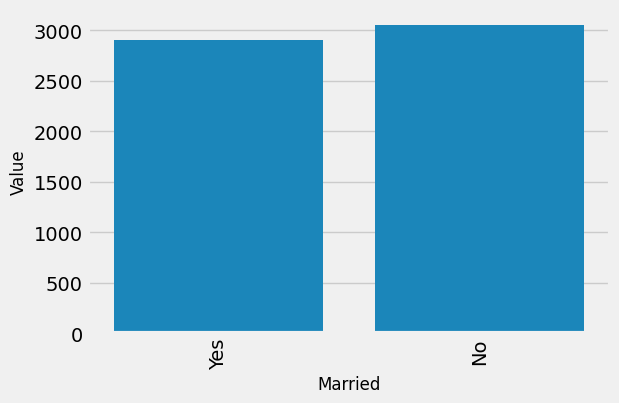

--------------------Children-------------------------
     total   percent
No    4171  0.699597
Yes   1791  0.300403




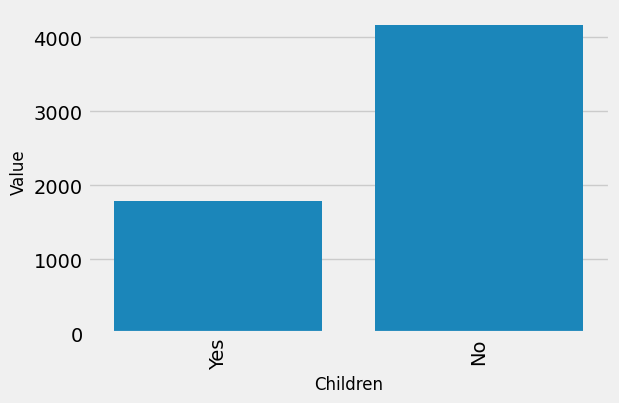

--------------------Phoneservice-------------------------
     total  percent
Yes   5372  0.90104
No     590  0.09896




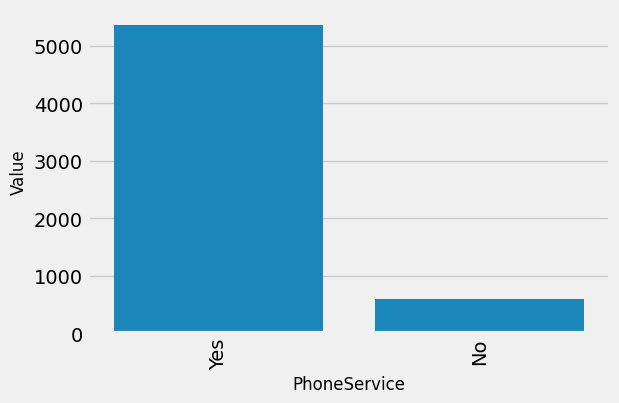

--------------------Multiplelines-------------------------
                  total   percent
No                 2824  0.473667
Yes                2548  0.427373
No phone service    590  0.098960




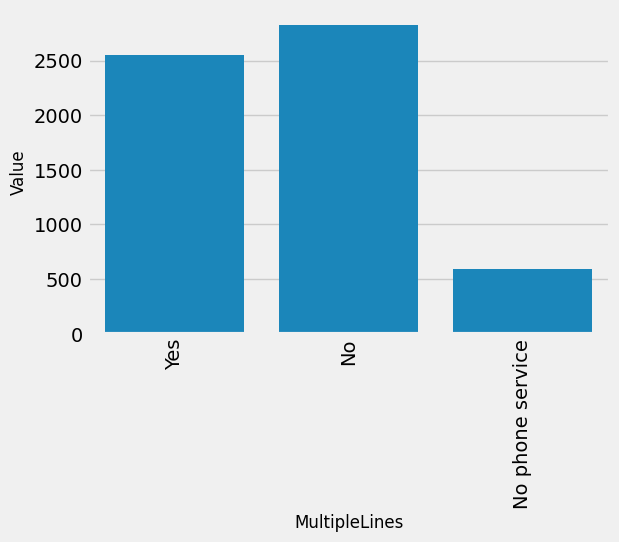

--------------------Internetservice-------------------------
             total   percent
Fiber optic   2622  0.439785
DSL           2065  0.346360
No            1275  0.213854




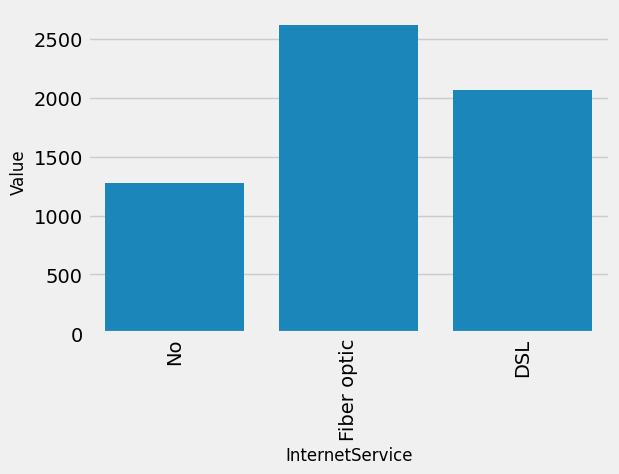

--------------------Onlinesecurity-------------------------
     total  percent
No    4249  0.71268
Yes   1713  0.28732




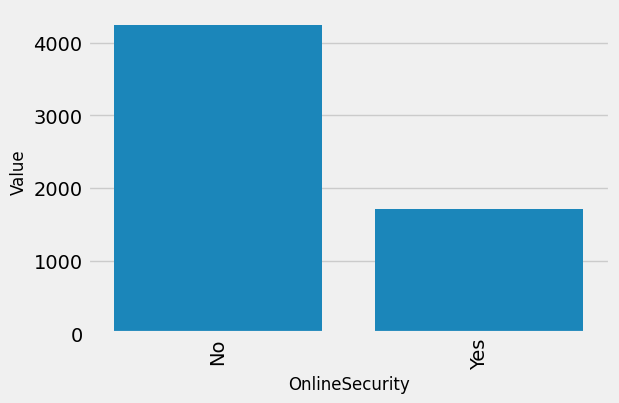

--------------------Onlinebackup-------------------------
     total   percent
No    3872  0.649446
Yes   2090  0.350554




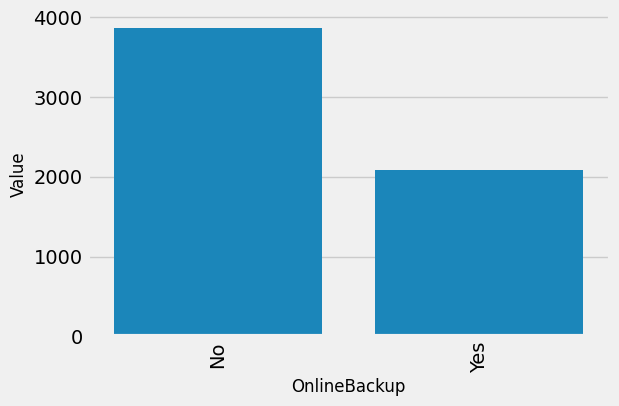

--------------------Deviceprotection-------------------------
     total   percent
No    3907  0.655317
Yes   2055  0.344683




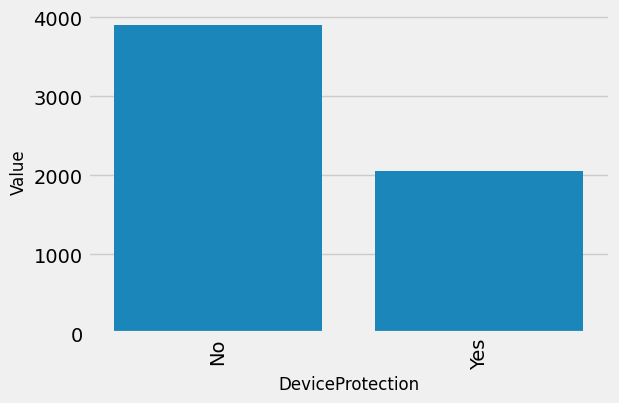

--------------------Techsupport-------------------------
     total  percent
No    4227  0.70899
Yes   1735  0.29101




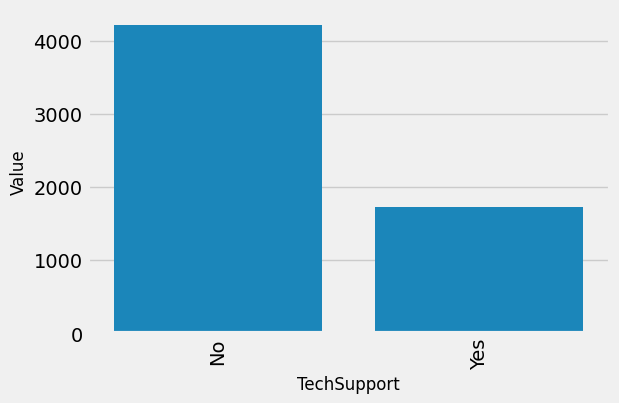

--------------------Streamingtv-------------------------
     total   percent
No    3656  0.613217
Yes   2306  0.386783




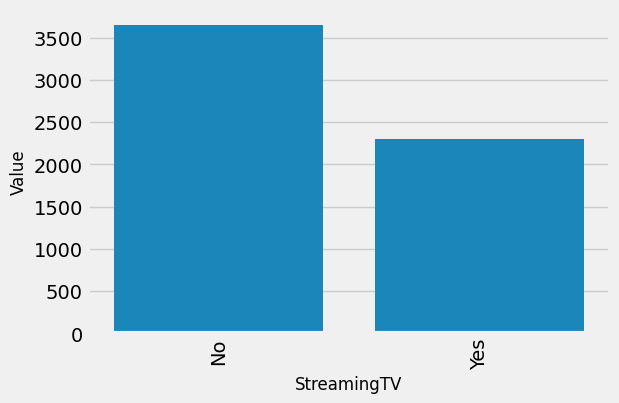

--------------------Streamingmovies-------------------------
     total   percent
No    3623  0.607682
Yes   2339  0.392318




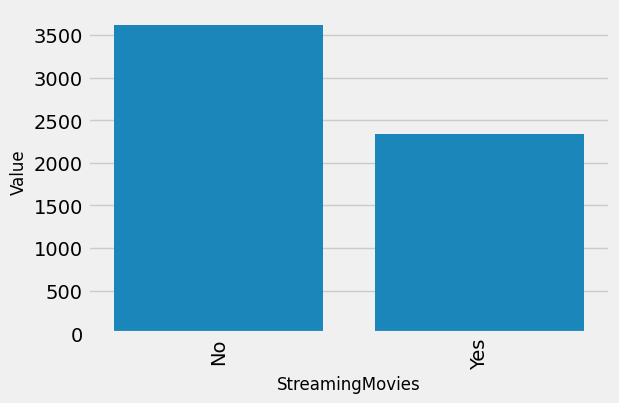

--------------------Contract-------------------------
                total   percent
Month-to-month   3245  0.544280
Two year         1441  0.241697
One year         1276  0.214022




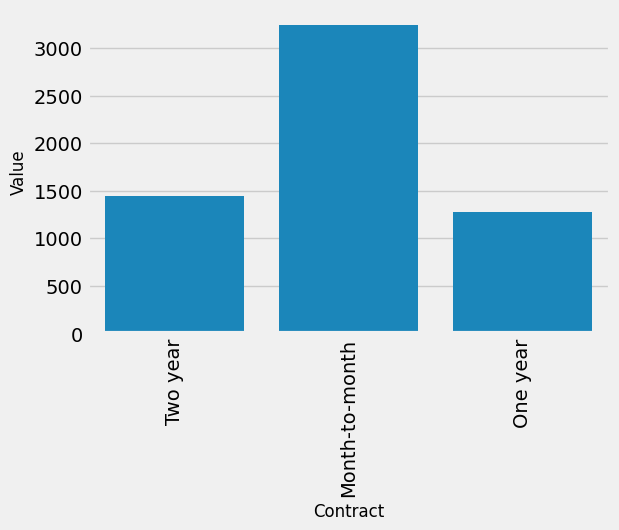

--------------------Paymentmethod-------------------------
                           total   percent
Electronic check            2001  0.335626
Mailed check                1350  0.226434
Bank transfer (automatic)   1308  0.219389
Credit card (automatic)     1303  0.218551




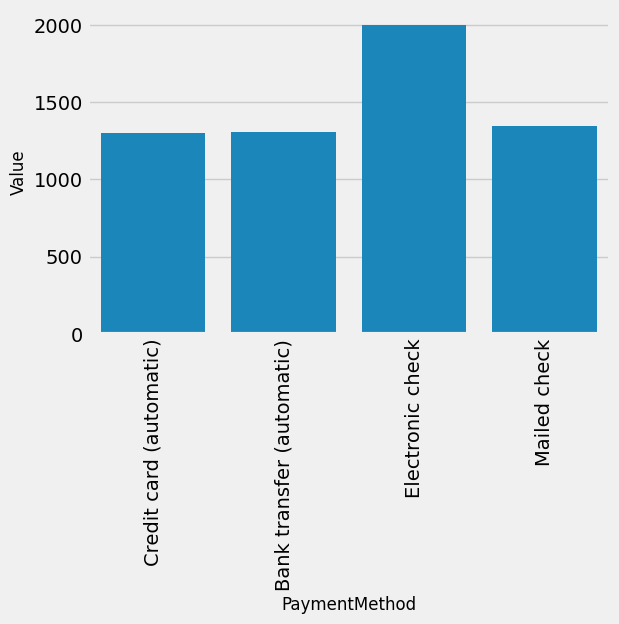

--------------------Churn-------------------------
     total   percent
No    4388  0.735995
Yes   1574  0.264005




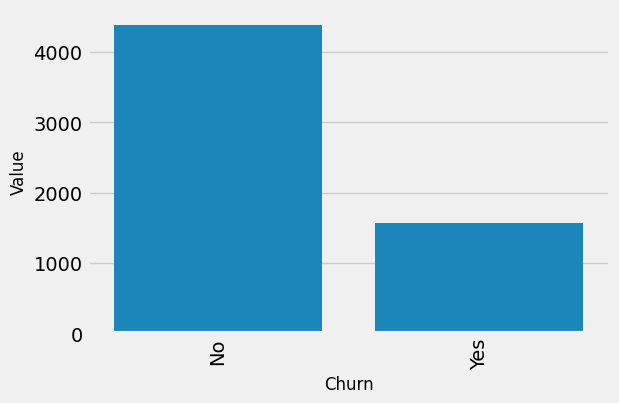

--------------------Numerical features -------------------------


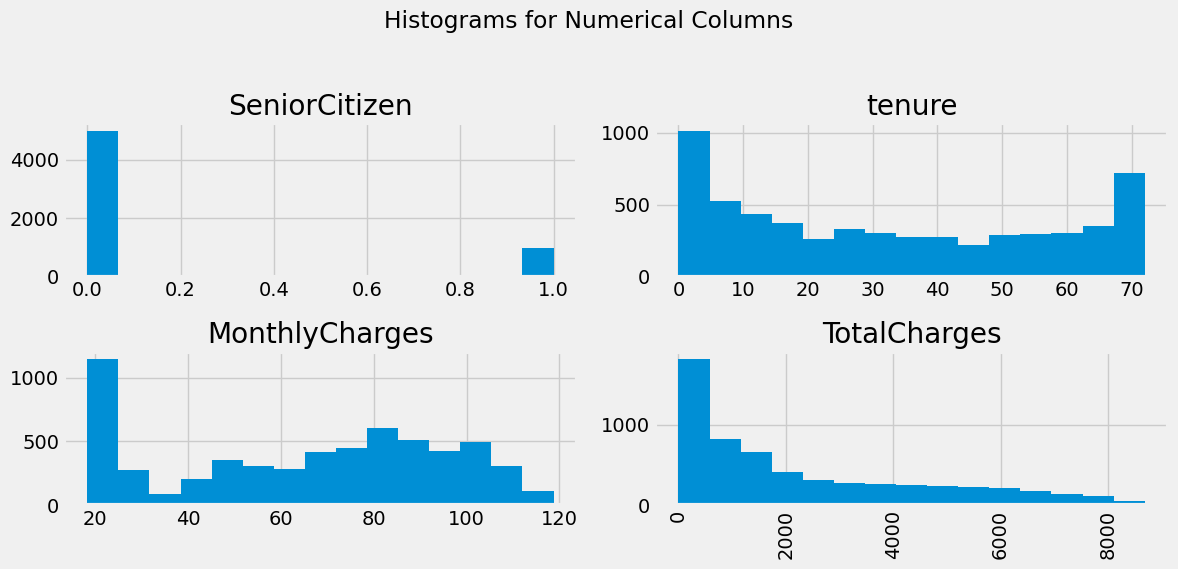

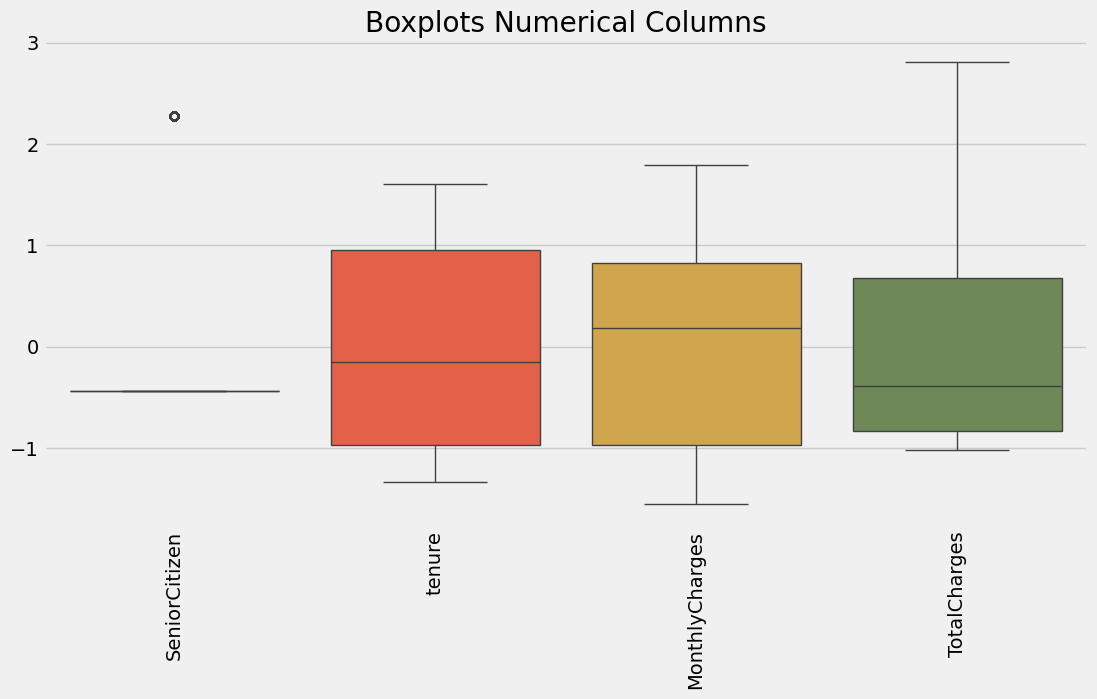

In [27]:
analyze_dataframe(df)

TODOS:
1. Scaling and transform
2. Clustering - K-Means, K-Medoids, Hierarchical, DBSCAN
3. Silhuetter and Elbow methods (Number of clusters)
4. Dimensionality reduction for visualization - PCA
5. Visualization

In [28]:
# Split the dataframe
X = df.drop(columns='Churn', axis = 1)
y = df['Churn']

In [29]:
# Standard scaling for numerical columns
# One Hot Encoding for categorical columns

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Select numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

K =  2 	WCSS Err. =  49845.0213525456
K =  3 	WCSS Err. =  44303.886371549175
K =  4 	WCSS Err. =  40446.00336948407
K =  5 	WCSS Err. =  38042.51516999824
K =  6 	WCSS Err. =  36150.72616667465
K =  7 	WCSS Err. =  34812.33312272971
K =  8 	WCSS Err. =  33677.0655768856
K =  9 	WCSS Err. =  32238.895955207685
K =  10 	WCSS Err. =  31718.747977363928


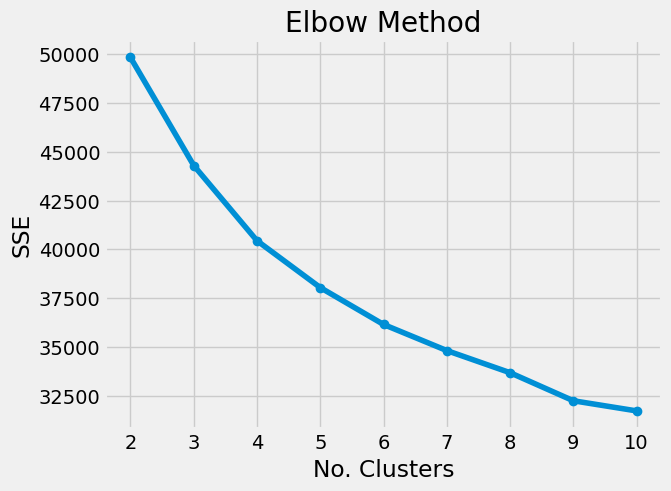

In [31]:
# Create and fit the KMeans model with preprocessing
def fit_kmeans(n_clusters, X):
    kmeans_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=9, verbose=0))
    ])
    kmeans_pipeline.fit(X)
    return kmeans_pipeline.named_steps["cluster"].inertia_

# Compute WCSS for different numbers of clusters
cluster_errors = []

for n_clusters in range(2, 11):
    wcsse = fit_kmeans(n_clusters,X)
    print('K = ', n_clusters, '\tWCSS Err. = ', wcsse)
    cluster_errors.append(wcsse)

# Plot the SSE for different numbers of clusters
plt.plot(range(2, 11), cluster_errors, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

For n_clusters = 2, The average silhouette_score is : 0.2202
For n_clusters = 3, The average silhouette_score is : 0.1661
For n_clusters = 4, The average silhouette_score is : 0.1723
For n_clusters = 5, The average silhouette_score is : 0.1675
For n_clusters = 6, The average silhouette_score is : 0.1444
For n_clusters = 7, The average silhouette_score is : 0.1368
For n_clusters = 8, The average silhouette_score is : 0.151
For n_clusters = 9, The average silhouette_score is : 0.141
For n_clusters = 10, The average silhouette_score is : 0.128


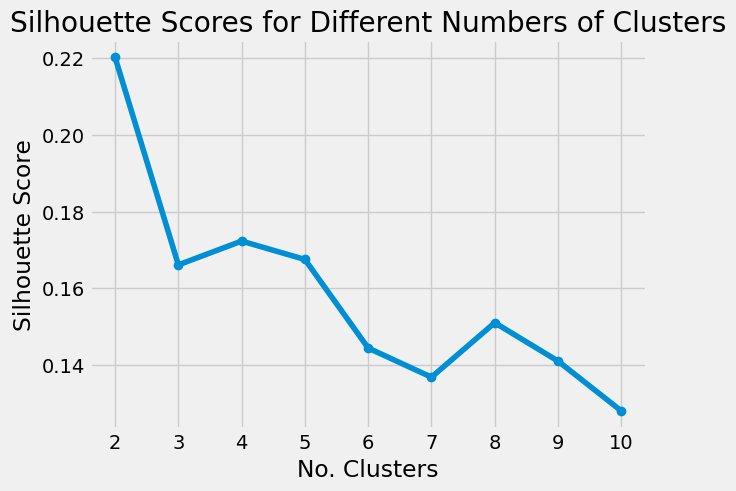

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score


silhouette_s = []

for n_clusters in range(2, 11):
    kmeans_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=9, verbose=0))
    ])

    # Fit the pipeline and get the cluster labels
    cluster_labels = kmeans_pipeline.fit_predict(X)
    
    # Get the preprocessed data
    X_tr = kmeans_pipeline.named_steps["preprocessor"].transform(X)
    
    silhouette_avg = silhouette_score(X_tr, cluster_labels).round(4)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")
    
    silhouette_s.append(silhouette_avg)

# Plot the Silhouette Scores for different numbers of clusters
plt.plot(range(2, 11), silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.show()

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>

In [33]:
# Visualization

In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Married', 'Children', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
from sklearn.decomposition import PCA

In [36]:
# Dimensionality Reduction (PCA) before Clustering

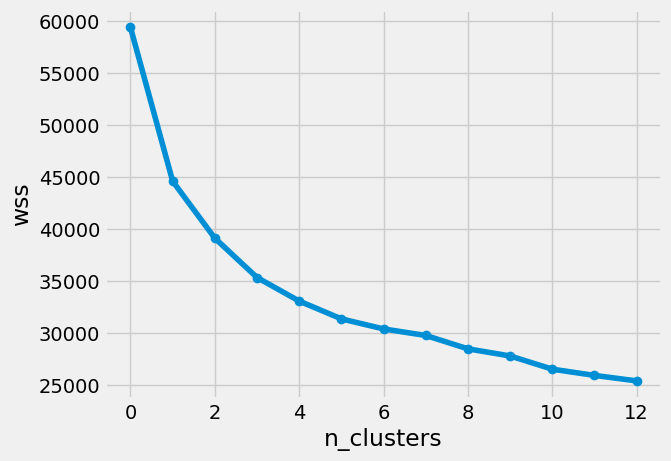

In [37]:
from sklearn.decomposition import PCA

cluster_errors = []

for n_cluster in range(1, 14):
    pipe_pca_kmean = Pipeline(
        [
            ("preprocessor", preprocessor), 
            ("pca", PCA(0.90)), 
            ("cluster", KMeans(n_clusters=n_cluster, random_state=9))]
    )

    pipe_pca_kmean.fit_predict(X)
    cluster_errors.append(pipe_pca_kmean.named_steps["cluster"].inertia_) 

#plt.clf()
plt.plot(cluster_errors, "o-")
plt.xlabel("n_clusters")
plt.ylabel("wss")
plt.show()

In [38]:
K = 3

# Define the pipeline with preprocessing, PCA, and KMeans clustering
pipe_pca_kmean_f = Pipeline([
    ("preprocessor", preprocessor), 
    ("pca", PCA(0.90)), 
    ("cluster", KMeans(n_clusters=K, random_state=9))
])

# Fit the pipeline and get the cluster labels
X['kmean_cluster'] = pipe_pca_kmean_f.fit_predict(X)

# Get the cluster inertia
cluster_errors = []
cluster_errors.append(pipe_pca_kmean_f.named_steps["cluster"].inertia_) 

X.head()

,gender,SeniorCitizen,Married,Children,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,kmean_cluster
1869,Male,0,Yes,Yes,72,Yes,Yes,No,No,No,No,No,No,No,Two year,Credit card (automatic),24.10,1734.65,2
4528,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Credit card (automatic),88.15,3973.20,1
6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Bank transfer (automatic),74.95,2869.85,0
6739,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Electronic check,55.90,238.50,0
432,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,Electronic check,53.45,119.50,0


#### Segmentation

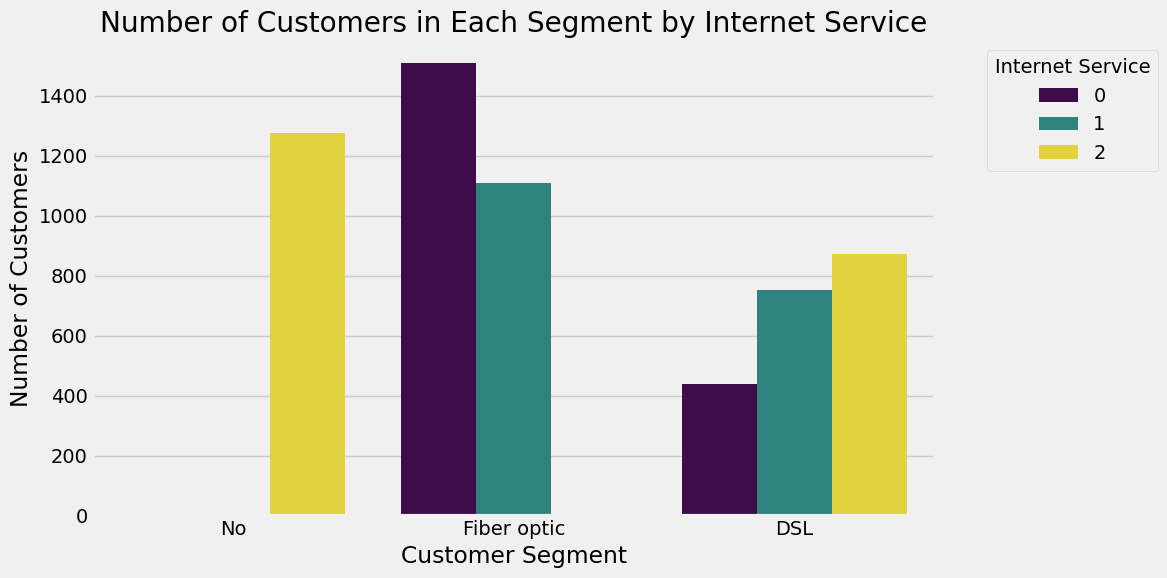

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=X, x='InternetService', hue='kmean_cluster', palette='viridis')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Segment by Internet Service')
plt.legend(title='Internet Service', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

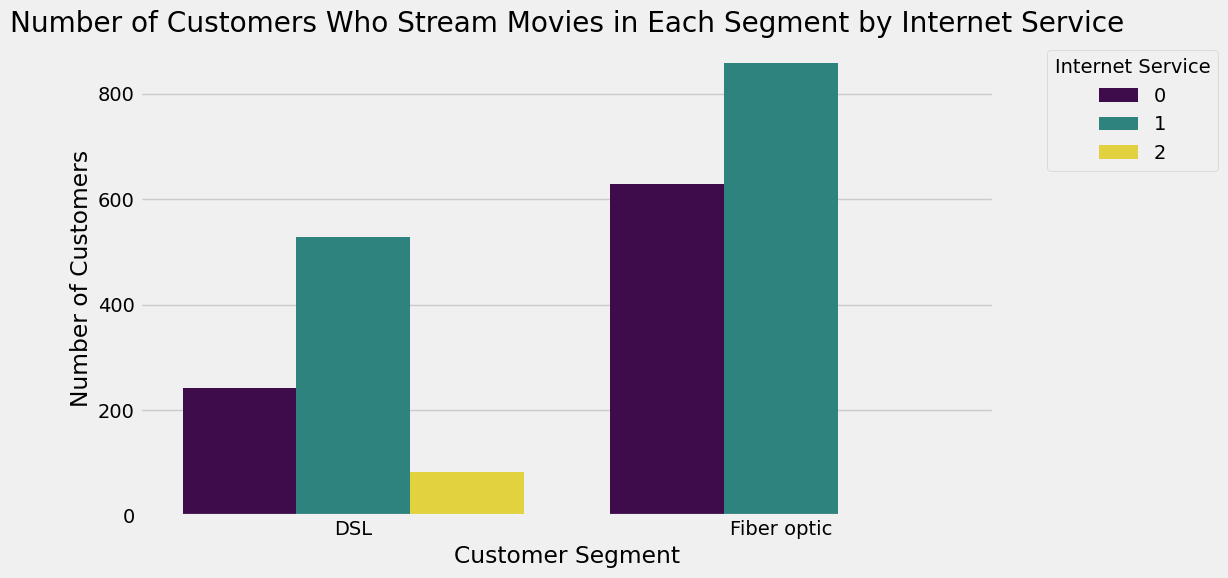

In [40]:
# Filter the data for customers who stream movies
streaming_df = X[X['StreamingMovies'] == 'Yes']

# Plotting the number of customers from each segment who stream movies based on the internet service they use
plt.figure(figsize=(12, 6))
sns.countplot(data=streaming_df, x='InternetService', hue='kmean_cluster', palette='viridis')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Who Stream Movies in Each Segment by Internet Service')
plt.legend(title='Internet Service', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

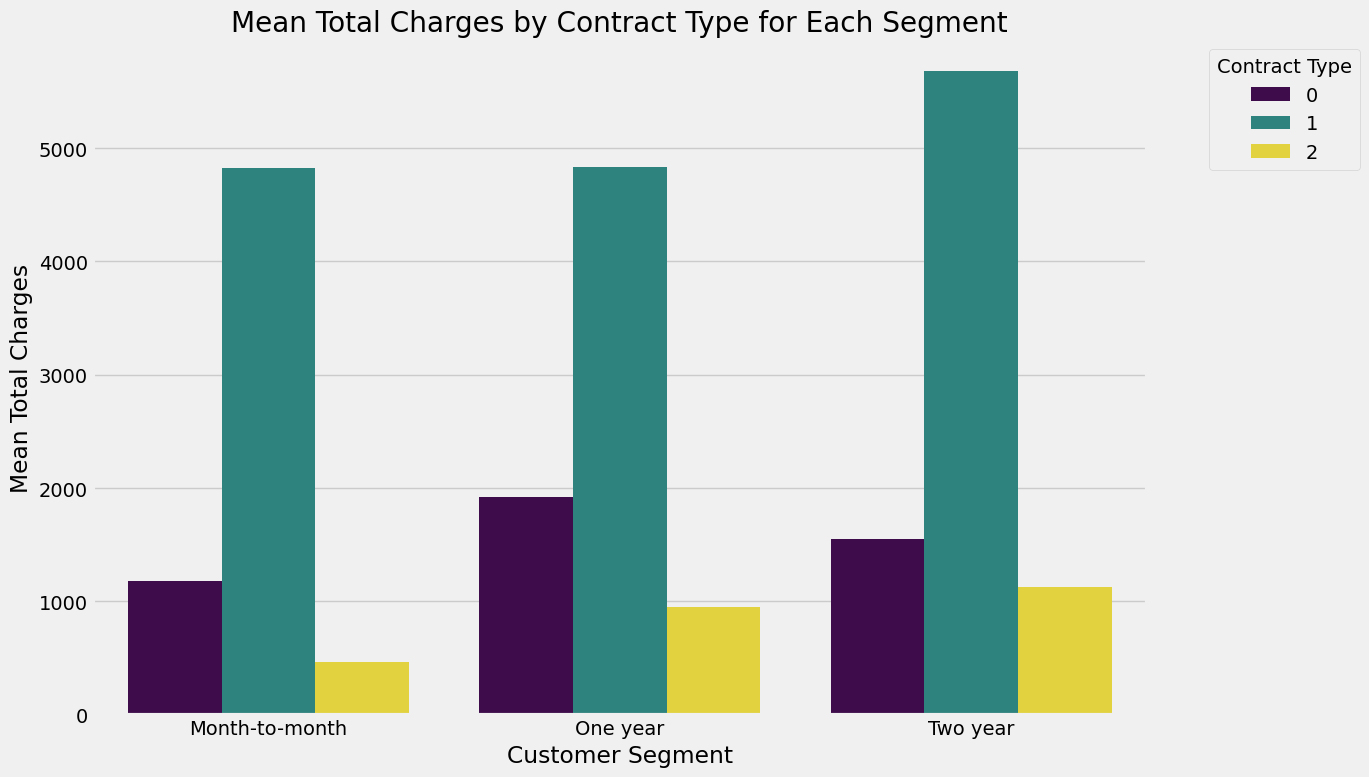

In [41]:
mean_total_charges = X.groupby(['kmean_cluster', 'Contract'])['TotalCharges'].mean().reset_index()

# Plotting the mean total charges by contract type for each segment
plt.figure(figsize=(14, 8))
sns.barplot(data=mean_total_charges, x='Contract', y='TotalCharges', hue='kmean_cluster', palette='viridis')
plt.xlabel('Customer Segment')
plt.ylabel('Mean Total Charges')
plt.title('Mean Total Charges by Contract Type for Each Segment')
plt.legend(title='Contract Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

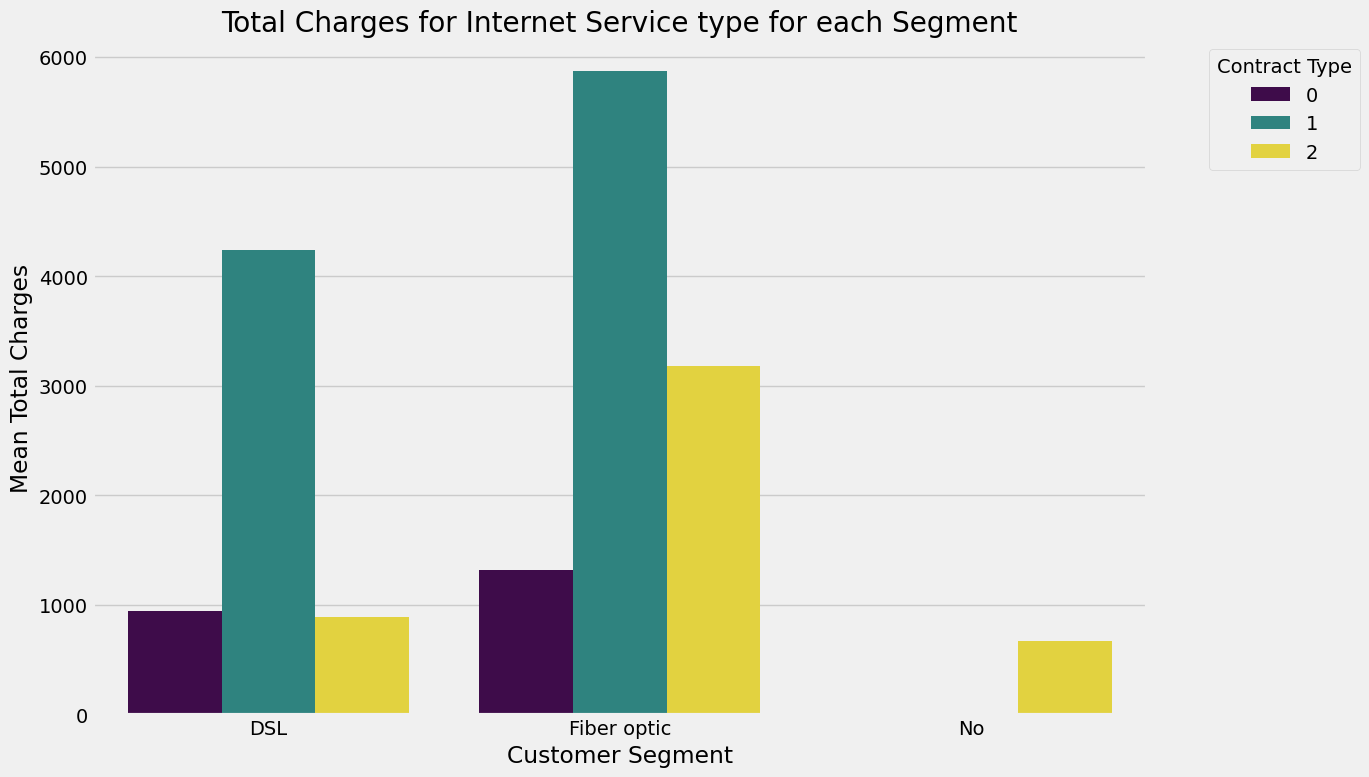

In [42]:
mean_total_charges = X.groupby(['kmean_cluster', 'InternetService'])['TotalCharges'].mean().reset_index()

# Plotting the mean total charges by contract type for each segment
plt.figure(figsize=(14, 8))
sns.barplot(data=mean_total_charges, x='InternetService', y='TotalCharges', hue='kmean_cluster', palette='viridis')
plt.xlabel('Customer Segment')
plt.ylabel('Mean Total Charges')
plt.title('Total Charges for Internet Service type for each Segment')
plt.legend(title='Contract Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

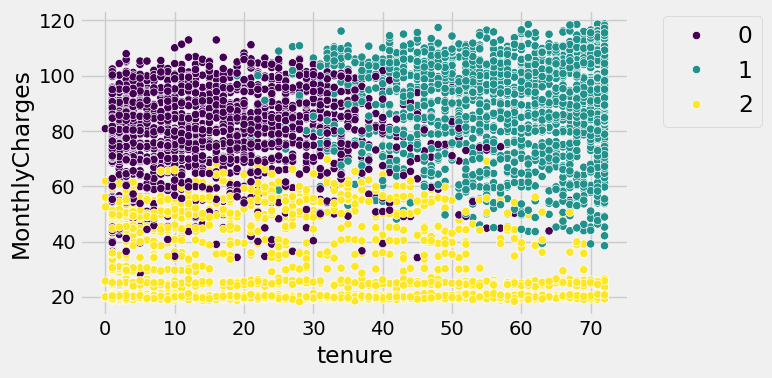

In [43]:

# Plot the results
plt.figure(figsize=(8, 4))
ax = sns.scatterplot(
    x='tenure',
    y='MonthlyCharges',
    hue='kmean_cluster',
    data=X,
    palette='viridis'
)
ax.legend(bbox_to_anchor=(1.04, 1.02), loc='upper left', fontsize='large')
plt.tight_layout()
plt.show()


## Classification

In [44]:
# 1. define features and labels
# 2. choose features
# 3. train test split

In [45]:
df.columns

Index(['gender', 'SeniorCitizen', 'Married', 'Children', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
df.columns

Index(['gender', 'SeniorCitizen', 'Married', 'Children', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
Xx = df.drop(columns = 'Churn', axis = 1)
yy = df['Churn']

In [48]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape

((4769, 18), (1193, 18), (4769,))

In [49]:
from pycaret.classification import *

In [50]:
%env MLFLOW_TRACKING_URI=https://2521-2a02-168-57c6-0-68e5-3a-ff22-7e75.ngrok-free.app

env: MLFLOW_TRACKING_URI=https://2521-2a02-168-57c6-0-68e5-3a-ff22-7e75.ngrok-free.app


In [51]:

clsfr = setup(
    data=pd.concat([X_train, y_train], axis=1),
    target = 'Churn',
    session_id=9,
    #max_encoding_ohe=600, # columns with 600 or less categories will be One-hot encoded ELSE target encoding
    #rare_to_value=0.008, # Categories with less than 0.008 (0.8%) of the data will be grouped into a new category (Other)
    #rare_value='Other',
    fix_imbalance = True,
    fix_imbalance_method = 'SMOTE',
    transformation = True,
    transformation_method = 'yeo-johnson',
    experiment_name='Clsfctn_tel_cust_ayushya_(dm)',
    log_experiment = False,
    normalize=True,  # True, False
    normalize_method='zscore',  # 'zscore', 'minmax', 'maxabs', 'robust'
    n_jobs=-1)

,Description,Value
0,Session id,9
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(4769, 19)"
5,Transformed data shape,"(6367, 28)"
6,Transformed train set shape,"(4936, 28)"
7,Transformed test set shape,"(1431, 28)"
8,Numeric features,4
9,Categorical features,14


7. Train and compare models

In [52]:
best_models = compare_models(fold = 5,
                             n_select=1,
                             sort='f1',

                        )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8041,0.8511,0.8041,0.8087,0.8061,0.5025,0.5031,1.3640
gbc,Gradient Boosting Classifier,0.8068,0.8518,0.8068,0.8050,0.8057,0.4933,0.4936,0.3460
lda,Linear Discriminant Analysis,0.8008,0.8504,0.8008,0.8081,0.8037,0.4995,0.5007,0.1000
ridge,Ridge Classifier,0.8002,0.8506,0.8002,0.8075,0.8031,0.4979,0.4992,0.1080
ada,Ada Boost Classifier,0.7966,0.8430,0.7966,0.8029,0.7991,0.4862,0.4874,0.1780
lightgbm,Light Gradient Boosting Machine,0.7972,0.0000,0.7972,0.7908,0.7932,0.4543,0.4558,0.1640
rf,Random Forest Classifier,0.7978,0.0000,0.7978,0.7903,0.7924,0.4500,0.4529,0.2060
et,Extra Trees Classifier,0.7816,0.0000,0.7816,0.7748,0.7773,0.4125,0.4141,0.1740
svm,SVM - Linear Kernel,0.7630,0.7981,0.7630,0.7718,0.7665,0.4050,0.4065,0.6940
nb,Naive Bayes,0.7337,0.0000,0.7337,0.8031,0.7489,0.4269,0.4569,0.6940


8. Save ML Flow and analyse

In [53]:
#!mlflow ui

9. Chose and analyse the best model

10. Tune the hyperparameters

In [55]:
lr_model = create_model('lr')

param_grid = {
    'C': [0.01,0.05, 0.1,0.5, 1, 10, 100]
}

# Tune the model
tuned_model = tune_model(lr_model, custom_grid=param_grid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8024,0.8647,0.8024,0.7996,0.8009,0.4793,0.4796
1,0.7725,0.8383,0.7725,0.7898,0.7788,0.4465,0.4504
2,0.8293,0.8816,0.8293,0.8300,0.8297,0.5587,0.5587
3,0.7964,0.8352,0.7964,0.7980,0.7972,0.4754,0.4755
4,0.8413,0.8966,0.8413,0.8397,0.8404,0.5835,0.5836
5,0.7964,0.8176,0.7964,0.8066,0.8004,0.4941,0.4961
6,0.7964,0.8228,0.7964,0.8012,0.7985,0.4831,0.4836
7,0.8293,0.8668,0.8293,0.8275,0.8284,0.5520,0.5522
8,0.7868,0.8652,0.7868,0.8045,0.7930,0.4841,0.4887


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8024,0.8647,0.8024,0.7996,0.8009,0.4793,0.4796
1,0.7725,0.8383,0.7725,0.7898,0.7788,0.4465,0.4504
2,0.8293,0.8816,0.8293,0.8300,0.8297,0.5587,0.5587
3,0.7964,0.8352,0.7964,0.7980,0.7972,0.4754,0.4755
4,0.8413,0.8966,0.8413,0.8397,0.8404,0.5835,0.5836
5,0.7964,0.8176,0.7964,0.8066,0.8004,0.4941,0.4961
6,0.7964,0.8228,0.7964,0.8012,0.7985,0.4831,0.4836
7,0.8293,0.8668,0.8293,0.8275,0.8284,0.5520,0.5522
8,0.7868,0.8652,0.7868,0.8045,0.7930,0.4841,0.4887


Fitting 10 folds for each of 7 candidates, totalling 70 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


11. Analyse the performance of the model

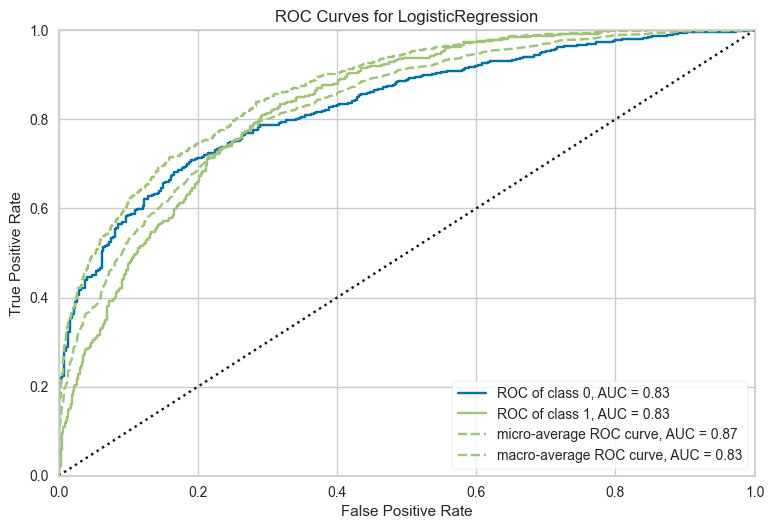

In [56]:
plot_model(tuned_model)

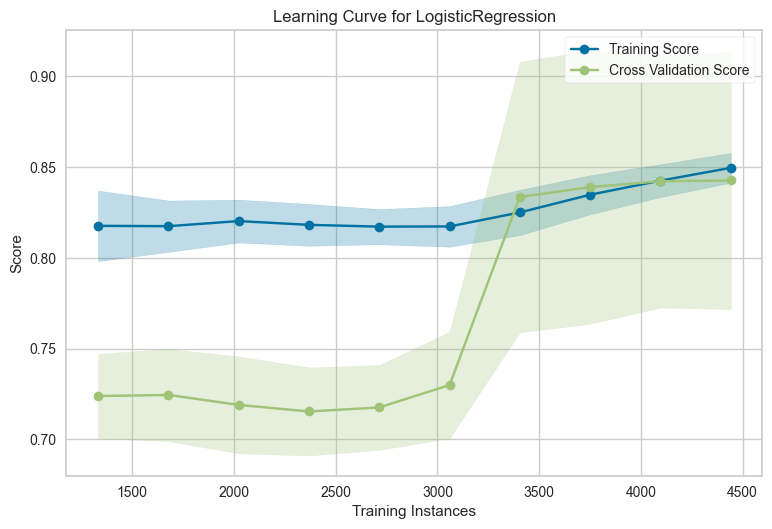

In [57]:
plot_model(tuned_model,plot='learning')

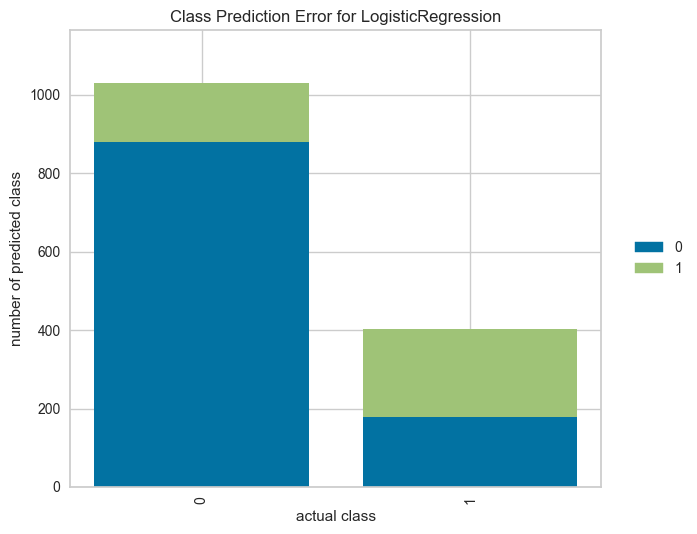

In [58]:
plot_model(tuned_model,plot='error')

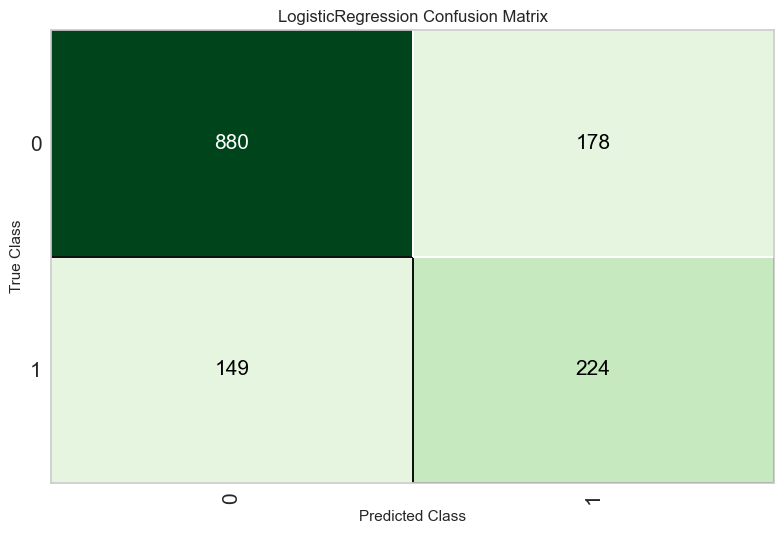

In [59]:
plot_model(tuned_model,plot='confusion_matrix')

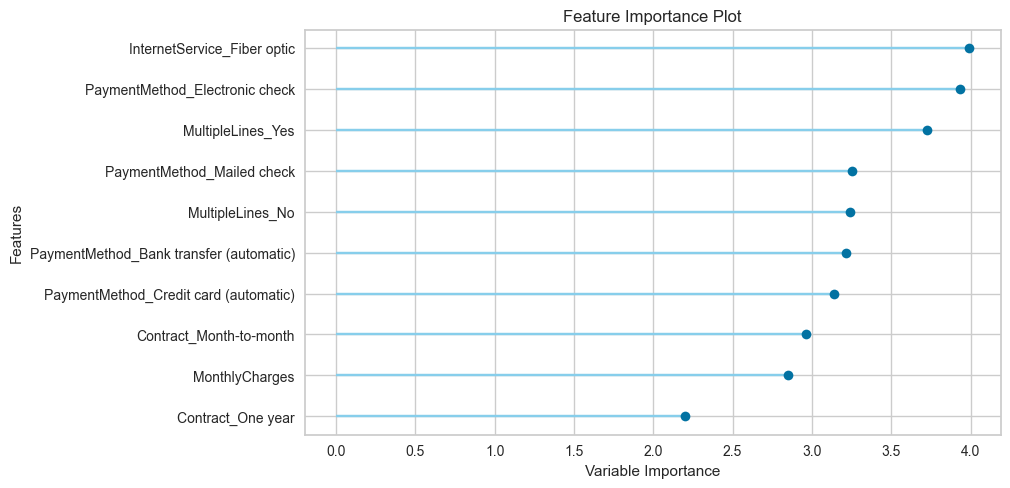

In [60]:
plot_model(tuned_model,plot='feature')

12. Finalize and predict and save the chosen model  